# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="data"> FINAL PROJECT (Python - Module 504)</p>

In [2]:
from IPython.display import HTML

header = """
<img src="https://www.gisma.com/media/1198/gisma-business-school-logo.svg" 
width="240" height="240"style="margin-left:auto ;margin-right:auto "/>'
"""
HTML(header)

<IPython.core.display.Javascript object>

# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="data"> Business Problem Understanding</p>

As a data science consultant, I have been hired to build an exploratory data analysis pipeline for the given dataset, `WA_Fn-UseC_-Telco-Customer-Churn.CSV`, provided by the client company.The dataset contains 7k records and 20 features. My task is to answer the 10 business questions given by the client company and create a Jupyter Notebook to explain my analysis.

The exploratory data analysis pipeline I have designed and implemented includes the following steps:

1. Data Cleaning: Identifying and addressing any missing or incorrect data.
2. Exploratory Data Analysis: Examining the dataset to better understand its structure and content.
3. Data Visualization: Developing visualizations to better illustrate the data and answer the business questions.
4. Results: Summarizing the results and providing the client company with actionable insights.

This dataset contains information on a client of TelCo's in the industry, including demographics, purchases of various services, monthly and total payments for each customer, and churn rates. As a result, I made an effort to respond to and explain a few inquiries that are usually intriguing from a business perspective. The resulting Jupyter Notebook will be submitted to the client company, containing the visualizations, results of the exploratory data analysis, models, and recommendations.

**Dataset Download link🔗:**

https://drive.google.com/drive/folders/1tVeHMCC-L7UBGAf5vRRHrLr8qhdkKtRs

# <p style=" font-family:calibri; font-size:70%; text-color:Black; text-align:center;color:black" id="data"> Variable Description</p>


|Row #|Attribute|Description|
|:--------|:-------|:---------|
|1|customerID|Unique Values|
|2|gender|Whether the customer is a male or a female|
|3|SeniorCitizen|Indicates if the customer is 65 or older (1, 0)|
|4|Partner|Whether the customer has a partner or not (Yes, No)|
|5|Dependents|Whether the customer has dependents or not (Yes, No)|
|6|Tenure|Number of months the customer has stayed with the company|
|7|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|8|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|9|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|10|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|
|11|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|12|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|13|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|14|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service)|
|15|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|16|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|17|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|18|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|19|MonthlyCharges|The amount charged to the customer monthly|
|20|TotalCharges|The total amount charged to the customer|
|21|Churn|Customers who left within the last month, the column is called Churn (Yes or No)|

# [Table of Contents](#Table-of-Contents)

- [1. Importing Libraries](#dataa)
- [2. Data Collection](#collection)
- [3. Questions](#Questions)
- 3.01 [Q01: Which client records were incorrectly added or are empty? Suggest solutions and take necessary action to ensure clean data.](#q1)
- 3.02 [Q02: We need an interactional GUI to capture customer ID from a user and present retrieved information in a readable format.](#q2)
- 3.03 [Q03: How many male and female customers with seniority status does this company have?](#q3)
- 3.04 [Q04: What is the percentage of customers who have churned in the given dataset?](#q4)
- 3.05 [Q05: Q5. What are the highest and lowest total charges amongst all customers, and what is the average total charge across all customers?](#q5)
- 3.06 [Q06: What is the Telco's diversity of subscribers depending on contract type?](#q6)
- 3.07 [Q07: Which payment option is most frequently utilized by customers?](#q7)
- 3.08 [Q08: What is the average monthly charge of customers who have Fiber-Optic internet services and have churned?](#q8)
- 3.09 [Q09: What is the average monthly charges for customers with paperless billing?](#q9)
- 3.10 [Q10: What is the distribution of tenancy of customers compared to their contracts?](#q10)
- [4. Conclusion](#conclusion)
- [5. Reference](#references)



# <p style="background-color:green; font-family:caliber; font-size:120%; text-color:white; text-align:center;color:white" id="dataa"> 1.Importing Libraries <a name="dataa"></a></p>

In [3]:
# File I/O Libraries
import os
import shutil

# Network Libraries
import urllib.request

# Date and Time Libraries
import datetime

# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

**Library Description**

|Row # | Library Name      | Description                                              |
|:------|:------------------|:----------------------------------------------------------|
|1     | os               | This library provides an easy way of manipulating different file paths and directories.|
|2     | shutil            | This library provides various functions for high-level file operations such as copying, deleting, and moving files and directories.|
|3     | urllib.request   | This library is used for opening and reading URLs.|
|4     | datetime         | This library provides various classes and functions to perform date and time related operations.|
|5     | pandas           | This library is used for data analysis and manipulation. It provides various functions for reading and writing data from/to different file formats.|
|6     | numpy            | This library provides various functions for mathematical, scientific and statistical operations.|
|7     | matplotlib       | This library provides various functions for plotting data in various forms. |
|8     | seaborn          | This library is based on matplotlib and provides a high-level interface for drawing attractive statistical graphics.|

# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="collection"> 2. Data Collection<a name="collection"></a></p>


**Download Dataset**

In [4]:
url = "https://drive.google.com/uc?export=download&id=1-1yho1b7l2nGX7C0taSKmyxyT9C-rGti"

filename = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

with urllib.request.urlopen(url) as response, open(filename, "wb") as out_file:
    shutil.copyfileobj(response, out_file)
    print("Download complete!")

Download complete!


<IPython.core.display.Javascript object>


| Description|
|:-----------|
|The above block code downloads a file from Google Drive to be accessible easily and stores it with the specified filename in code root directoy. The urllib.request library is used to open the URL, and the shutil library is used to copy the file from the URL to the out_file. Once the file is copied, a "Download complete!" message is printed to the console.|

---

**Reporting Directory**

In [5]:
if not os.path.exists(".\Reports"):
    os.mkdir("Reports")

<IPython.core.display.Javascript object>


| Description|
|:-----------|
| At the beginning of this project, a directory was created to store and distribute any output results to all relevant stakeholders. This directory serves as a platform for efficient collaboration, enabling stakeholders to access and view all the necessary output results.|

---

In [6]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


<IPython.core.display.Javascript object>


| Description|
|:-----------|
| The pd.read_csv() method is used to read the csv file into a dataframe and the head(3) method is used to view the first three rows of the dataframe.|

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<IPython.core.display.Javascript object>

| Description|
|:-----------|
|This dataset contains information about customers of a telecom company and their churn rate, i.e. whether they stopped using the company's services. The df.info() command is used to display information about the dataset, including the column names, data types, and number of non-null values in each column. This is useful for getting an overview of the dataset before performing data analysis.|

# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="Questions"> 3. Questions<a name="Questions"></a></p>


# <p style="background-color:#1434A4; font-family:calibri; font-size:70%; text-color:white; text-align:left;color:white" id="q1"> Q1. Which client records were incorrectly added or are empty? Suggest solutions and take necessary action to ensure clean data.<a name="q1"></a></p>

**A1.1 Duplicate Checking**

In [8]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

| Description|
|:-----------|
|The above block of code checks for any duplicate rows in the DataFrame and returns the number of duplicates.As Data explored no duplicate has been found in this section.|

---

**A1.2 Datatype Casting**

In [9]:
df["TotalCharges"] = df["TotalCharges"].replace(r"\s+", np.nan, regex=True)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<IPython.core.display.Javascript object>

| Description|
|:-----------|
| After examining the "TotalCharges" field in our data set, we discovered that it was an object datatype rather than a float datatype like it should be. Upon further investigation, we discovered that some of the values contained spaces, so we set them to null values. To accomplish this, we employed a regex formula and the numpy library.

---

**A1.3 Null Values**

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<IPython.core.display.Javascript object>

| Description|
|:-----------|
|The above code results in 11 null values, indicating that 11 values in the dataframe are missing or have no data. This could be due to incomplete data when the data was collected, or errors in the data entry process.

---

In [11]:
df[df.isna().any(axis=1)]
null_idx = df[df["TotalCharges"].isna()]
df[df["TotalCharges"].isna()].head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No


<IPython.core.display.Javascript object>

| Description|
|:-----------|
|The above result codes return the first three rows of the dataframe where the TotalCharges column is null. This can be useful for identifying rows that need to be processed or replaced in order to properly analyze the data.

---

In [12]:
null_idx.index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

<IPython.core.display.Javascript object>

| Description|
|:-----------|
|The above result codes are returning the index values of any empty or null values in the dataframe. This is useful for identifying any missing data that may need to be filled in or removed.

---

In [13]:
df["TotalCharges"].fillna(df["MonthlyCharges"], inplace=True)
df.loc[null_idx.index].head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No


<IPython.core.display.Javascript object>

| Description|
|:-----------|
|The above code results in the column "TotalCharges" being filled with the value from the "MonthlyCharges" column for all rows that contained null values in the "TotalCharges" column.
This is done because the MonthlyCharges column contains the total amount of charges for a period of time, and so it is assumed that this same amount is being applied to the TotalCharges column for any rows that are missing a value.
The above code results show the first three rows of the dataframe with null values for the specified column, As expected all null values are replaced with new values"related Monthly Charges".

---

In [14]:
missing_val = df.isnull().sum().sort_values(ascending=False).head(5)
missing_per = round(missing_val / len(df) * 100, 2)
pd.DataFrame({"Null Values (Count)": missing_val, "Percentage (%)": missing_per.values})

,Null Values (Count),Percentage (%)
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0


<IPython.core.display.Javascript object>

|Description|
|:----------|
|This block of code is used to find the top 5 missing values in the data frame and the percentage of missing values for each column. The df.isnull().sum() method is used to calculate the number of missing values in each column and the values are sorted in descending order. Then, the head() method is used to get the top 5 columns with the highest number of missing values. Finally, the values are converted to percentages and displayed in a data frame.
The results of the above code indicate that there are no missing or null values in the dataset. This means that all the values in the dataset are complete and valid, which is essential for reliable data analysis.

**A1.4 Unique values(Data Consistency)**

In [15]:
data = []

for i in df.select_dtypes(include="object"):
    if i != "customerID":
        data.append(
            [i.ljust(15), str(df[i].unique()).ljust(30), str(df[i].nunique()).ljust(20)]
        )

table = pd.DataFrame(
    data, columns=["Column", "Unique Values", "Count of Unique Values"]
)

table
table.style.set_properties(**{"text-align": "left"}).set_table_styles(
    [{"selector": "the", "props": [("text-align", "center")]}]
)

,Column,Unique Values,Count of Unique Values
0,gender,['Female' 'Male'],2
1,Partner,['Yes' 'No'],2
2,Dependents,['No' 'Yes'],2
3,PhoneService,['No' 'Yes'],2
4,MultipleLines,['No phone service' 'No' 'Yes'],3
5,InternetService,['DSL' 'Fiber optic' 'No'],3
6,OnlineSecurity,['No' 'Yes' 'No internet service'],3
7,OnlineBackup,['Yes' 'No' 'No internet service'],3
8,DeviceProtection,['No' 'Yes' 'No internet service'],3
9,TechSupport,['No' 'Yes' 'No internet service'],3


<IPython.core.display.Javascript object>

| Description|
|:-----------|
|The above code is used to generate a table that displays the unique values and counts of unique values for all the columns of type 'object' in a given dataframe. The output of this code is a table that contains three columns, Column, Unique Values and Count of Unique Values. The Column column contains the names of the columns of type 'object' from the given dataframe, the Unique Values column contains a list of all the unique values for each column and the Count of Unique Values column contains the number of unique values for each column.|

---

| Q1 - Summary|
|:-----------|
|In conclusion, there were no duplicate or missing values, and no incorrect entries in other fields. However, there were 11 wrong values in the 'TotalCharges' field, which were replaced with the equivalent value from the 'MonthlyCharges' field. Our assumption is that the 'Total Charges' for each customer should be greater than or equal to their 'Monthly Charges'.

# <p style="background-color:#1434A4; font-family:calibri; font-size:70%; text-color:white; text-align:left;color:white" id="q2">Q2.We need an interactional GUI to capture customer ID from a user and present retrieved information in a readable format.<a name="q2"></a></p>

In [33]:
print(
    "\033[1mNote: Customer ID format is XXXX-YYYYY X: Digit, Y: Capital Alphabet Charachter A~Z, Example:4472-LVYGI\033[0m"
)
customer_id = input(
    "Please enter Customer ID (with format of 4472-LVYGI) or type 'quit' to exit: "
)

customer_id = str(customer_id)
while customer_id != "quit":
    try:
        if len(customer_id) == 10 and customer_id[4] == "-":
            if customer_id in df["customerID"].values:
                customer_info = df[df["customerID"] == customer_id]
                print("Customer information:\n")
                print(customer_info.head(1).T)

            else:
                print("Record not available in dataset")
        else:
            print("Invalid customer ID")
    except:
        print("Invalid customer ID")
    customer_id = input(
        "Please enter customer ID (with format 4472-LVYGI) or type 'quit' to exit: "
    )

Note: Customer ID format is XXXX-YYYYY X: Digit, Y: Capital Alphabet Charachter A~Z, Example:4472-LVYGI
Please enter Customer ID (with format of 4472-LVYGI) or type 'quit' to exit: 111
Invalid customer ID
Please enter customer ID (with format 4472-LVYGI) or type 'quit' to exit: 1111-YYYYY
Record not available in dataset
Please enter customer ID (with format 4472-LVYGI) or type 'quit' to exit: 4472-LVYGI
Customer information:

                                        488
customerID                       4472-LVYGI
gender                               Female
SeniorCitizen                             0
Partner                                 Yes
Dependents                              Yes
tenure                                    0
PhoneService                             No
MultipleLines              No phone service
InternetService                         DSL
OnlineSecurity                          Yes
OnlineBackup                             No
DeviceProtection                        Ye

<IPython.core.display.Javascript object>

| Description|
|:-----------|
|Using the try and exception method is a way to check if a customer ID is valid and if it is present in the dataset. The above code first asks the customer to enter the customer ID in the format XXXX-YYYYY, where X is a digit and Y is a capital alphabet character A-Z. If the customer enters "quit", the code will exit. 
If the customer enters a customer ID, the code will check the length of the customer ID and the hyphen in the customer ID using the if statement. If the customer ID is valid, the code will then check if the customer ID is present in the dataset using the if statement. If the customer ID is present in the dataset, the customer information will be displayed using the print statement. If the customer ID is invalid or not present in the dataset, an error message will be displayed. To make it more readable we trasnpose the output to have better view.
If an error occurs, the code will catch the error using the exception. The code will then display an error message.


# <p style="background-color:#1434A4; font-family:calibri; font-size:70%; text-color:white; text-align:left;color:white" id="q3">Q3. How many male and female customers with seniority status does this company have?<a name="q3"></a></p>


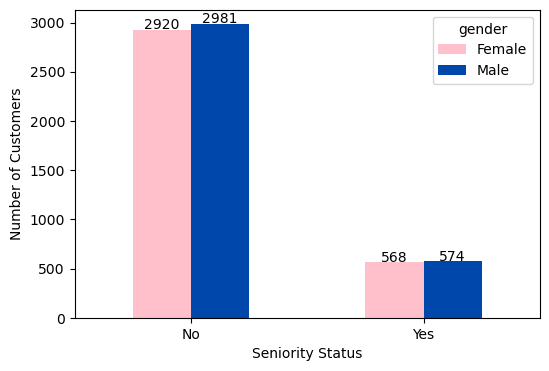

customerID
gender SeniorCitizen            
Female 0                    2920
       1                     568
Male   0                    2981
       1                     574

<IPython.core.display.Javascript object>

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))

counts = df.groupby(["gender", "SeniorCitizen"]).size().reset_index(name="counts")

counts["SeniorCitizen"] = counts["SeniorCitizen"].replace({1: "Yes", 0: "No"})

ax = counts.pivot(index="SeniorCitizen", columns="gender", values="counts").plot(
    kind="bar", ax=ax, color=["pink", "#0047AB"]
)

for p in ax.patches:
    ax.annotate(
        str(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height() * 1.005),
        ha="center",
    )
ax.set_xlabel("Seniority Status")
ax.set_ylabel("Number of Customers")

plt.xticks(rotation=0)

plt.show()
df.iloc[:, [0, 1, 2]].groupby(["gender", "SeniorCitizen"]).count()

| Description|
|:-----------|
|**Technical POV:** The above code is used to create a bar plot to visualize the number of customers in the Telco dataset by gender and seniority status. The code first groups the data by gender and seniority status, then creates a pivot table to plot the bar chart. The labels for the Seniority status are replaced with Yes and No. The height of each bar is annotated with the number of customers. Finally, the x and y labels are set and the x labels are rotated for better visualization.|
|**Business POV:** The output of the bar chart shows that there are more non-senior customers than senior customers in the dataset, and that there is an almost even split between male and female customers. This suggests that the Telco company has an even customer base across gender and seniority status.|

# <p style="background-color:#1434A4; font-family:calibri; font-size:70%; text-color:white; text-align:left;color:white" id="q4">Q4.  What is the percentage of customers who have churned in the given dataset?<a name="q4"></a></p>

Total number of customers: 7043
Total number of customers who churned: 1869
Percentage of customers who churned: 26.54%








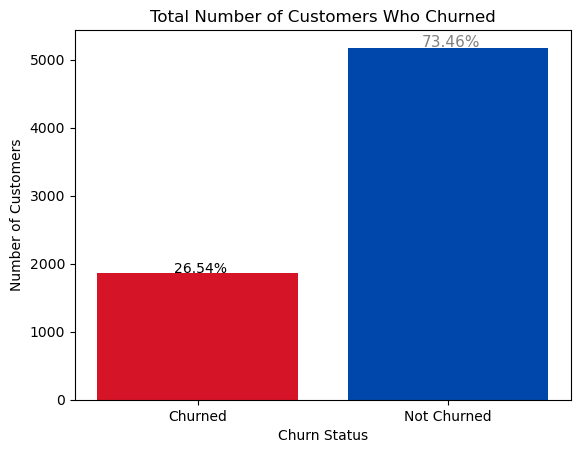

<IPython.core.display.Javascript object>

In [26]:
total_customers = df.shape[0]
print("Total number of customers: {}".format(total_customers))

total_churned_customers = df[df["Churn"] == "Yes"].shape[0]
print("Total number of customers who churned: {}".format(total_churned_customers))

percentage_churned = round((total_churned_customers / total_customers * 100), 2)
print("Percentage of customers who churned: {}%".format(percentage_churned))
print("\n\n\n\n\n")

plt.bar(
    ["Churned", "Not Churned"],
    [total_churned_customers, total_customers - total_churned_customers],
    color=["#D51428", "#0047AB"],
)
plt.title("Total Number of Customers Who Churned")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")

percentage_churned_label = "{}%".format(percentage_churned)
plt.text(0.01, total_churned_customers, percentage_churned_label, ha="center")

percentage_not_churned = round(
    ((total_customers - total_churned_customers) / total_customers * 100), 2
)
percentage_not_churned_label = "{}%".format(percentage_not_churned)
plt.text(
    1.01,
    total_customers - total_churned_customers + 80,
    percentage_not_churned_label,
    ha="center",
    va="center",
    fontsize=11,
    color="gray",
)

plt.show()

| Description|
|:-----------|
|**Technical POV:** The above code is used to calculate the total number of customers who have churned in a given dataset. The code first calculates the total number of customers, then the total number of customers who churned, and finally the percentage of customers who churned. The code then uses matplotlib to plot a bar chart showing the total number of customers who churned and those who did not. The code also adds percentage labels to the bar chart to show the exact percentages of customers who churned and those who did not.|
|**Business POV:** It shows that 1869 out of 7043 customers (26.54%) have churned. This information can be used to identify areas of customer churn that need to be addressed, such as customer service, product offerings, or pricing. By understanding where customer churn is occurring, telco companies can make informed decisions about how to better retain customers. This is an important metric to track as it allows companies to identify customers who are at risk of leaving and take proactive steps to retain them. By understanding the churn rate, companies can also understand what they are doing well and what needs to be improved in order to reduce churn and increase customer loyalty. The code provides a visual representation of the churn rate, making it easy to understand and interpret. This allows companies to quickly identify trends in the customer churn rate and adjust their strategies accordingly.|


# <p style="background-color:#1434A4; font-family:calibri; font-size:70%; text-color:white; text-align:left;color:white" id="q5">Q5. What are the highest & lowest total charges amongst all customers, and what is the average total charge across all customers?<a name="q5"></a></p>



In [20]:
df_highest = df.iloc[:, [0, 1, 19]].nlargest(1, ["TotalCharges"])
df_lowest = df.iloc[:, [0, 1, 19]].nsmallest(1, ["TotalCharges"])
total_avg = [round(df["TotalCharges"].mean(), 2)]

df_highest["Total Average"] = total_avg
df_highest.rename(
    columns={
        "gender": "Gender",
        "TotalCharges": "Total Charges",
        "customerID": "Customer ID",
    },
    inplace=True,
)

df_lowest["Total Average"] = total_avg
df_lowest.rename(
    columns={
        "gender": "Gender",
        "TotalCharges": "Total Charges",
        "customerID": "Customer ID",
    },
    inplace=True,
)

df_combined = pd.concat([df_highest, df_lowest])
df_combined

,Customer ID,Gender,Total Charges,Total Average
4610,2889-FPWRM,Male,8684.8,2279.8
1654,2967-MXRAV,Male,18.8,2279.8


<IPython.core.display.Javascript object>

| Description|
|:-----------|
|**Technical POV:** The above code is used to find the highest and lowest Total Charges values by customer in a given dataset. The code uses the nlargest and nsmallest functions to find the highest and lowest values respectively. The code then creates two new dataframes, one for each highest and lowest value, and combines them into a single dataframe that includes the customer ID, gender, total charges, and the average total charges.|
|**Business POV:** The company can use the above results to find out the customers with the highest and lowest total charges. This can be used to identify customers that are spending more or less money than the average customer. The company can then use this information to create targeted marketing campaigns for high spending customers or loyalty programs for low spending customers.|

# <p style="background-color:#1434A4; font-family:calibri; font-size:70%; text-color:white; text-align:left;color:white" id="q6">Q6. What is the Telco's diversity of subscribers depending on contract type?<a name="q1"></a></p>

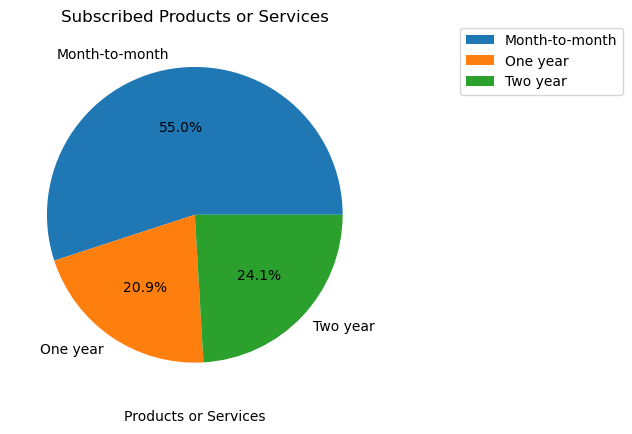

<IPython.core.display.Javascript object>

In [21]:
plt.pie(
    df.groupby("Contract")["Churn"].count(),
    labels=df.groupby("Contract")["Churn"].count().index,
    autopct="%1.1f%%",
)
plt.title("Subscribed Products or Services")
plt.xlabel("Products or Services")

plt.legend(
    bbox_to_anchor=(1.2, 1.025),
    loc="upper left",
    labels=sorted(df.groupby("Contract")["Churn"].count().index),
)

plt.show()

| Description|
|:-----------|
|**Technical POV:** The above code shows a pie chart which presents the percentage of customers subscribed to each products or services offered by Telco. The labels in the chart represent the different services or products offered by the company, and the percentage value in each slice represents the number of customers that have subscribed to that particular service or product.|
|**Business POV:** This chart shows the importance of having customers sign a long-term contract. The chart shows that customers with a two-year contract had the lowest churn rate (24.1%), while customers with a month-to-month contract had the highest churn rate (55.0%). This suggests that customers who sign a longer-term contract are more likely to stay with the company, and should be encouraged to do so. Furthermore, this information can be used to inform marketing and customer retention strategies, as well as pricing and discounting strategies to incentivize customers to sign a longer-term contract.|


# <p style="background-color:#1434A4; font-family:calibri; font-size:70%; text-color:white; text-align:left;color:white" id="q7">Q7. Which payment option is most frequently utilized by customers?<a name="q7"></a></p>

The most popular payment method used by the customers is Electronic check
Number of customers using Electronic check: 2365 (33.58%)


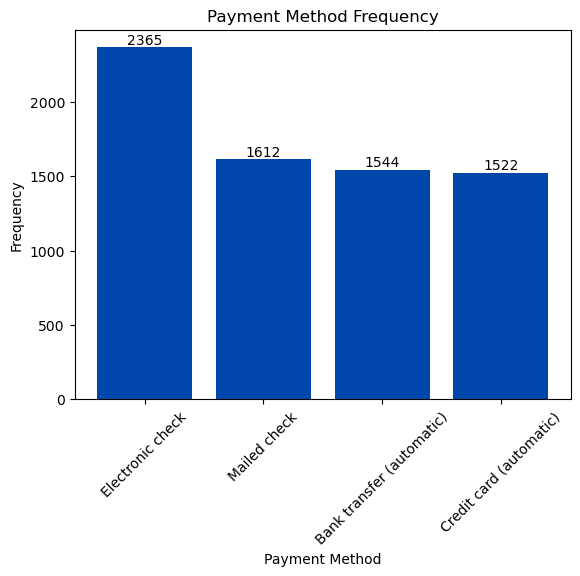

<IPython.core.display.Javascript object>

In [25]:
total_customers = df.shape[0]
payment_method_freq = df["PaymentMethod"].value_counts()
most_popular_payment_method = payment_method_freq.index[0]
most_popular_payment_method_count = payment_method_freq.values[0]

most_popular_payment_method_percentage = (
    most_popular_payment_method_count / total_customers
) * 100

print(
    "The most popular payment method used by the customers is {}".format(
        most_popular_payment_method
    )
)
print(
    "Number of customers using {}: {} ({:.2f}%)".format(
        most_popular_payment_method,
        most_popular_payment_method_count,
        most_popular_payment_method_percentage,
    )
)

payment_method_freq = df["PaymentMethod"].value_counts()
most_popular_payment_method = payment_method_freq.index[0]
payment_method_freq = df["PaymentMethod"].value_counts()
plt.bar(payment_method_freq.index, payment_method_freq.values, color="#0047AB")
plt.title("Payment Method Frequency")
plt.xlabel("Payment Method")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

for x, y in zip(payment_method_freq.index, payment_method_freq.values):
    plt.text(x, y, "%d" % y, ha="center", va="bottom")

plt.show()

| Description|
|:-----------|
|**Technical POV:** Above block code is written using Pandas to read the dataset and extract the data. The 'value_counts()' function is then used to calculate the frequency of each payment method. The most popular payment method, its count, and its percentage are then calculated and printed as output.|
|**Business POV:** This information can be used to understand customer payment preferences and inform decisions on how to optimize payment processing and cost savings. The output of the code shows that the most popular payment method used by customers is Electronic Check, with 33.58% of customers using this payment method. This data can be used to inform decisions on which payment processors to use, which payment methods to advertise, and how to optimize the cost of payment processing.|

# <p style="background-color:#1434A4; font-family:calibri; font-size:70%; text-color:white; text-align:left;color:white" id="q8">Q8. What is the average monthly charge of customers who have Fiber-Optic internet services and have churned?<a name="q8"></a></p>

In [28]:
avg_fiber_churn_monthly_charge = round(
    df[(df["InternetService"] == "Fiber optic") & (df["Churn"] == "Yes")][
        "MonthlyCharges"
    ].mean(),
    2,
)

print(
    "Average monthly charge of customers who have Fiber optic internet services and churned: ${}".format(
        avg_fiber_churn_monthly_charge
    )
)

Average monthly charge of customers who have Fiber optic internet services and churned: $88.13


<IPython.core.display.Javascript object>

| Description|
|:-----------|
|**Technical POV:** The above block code is a query that finds the average monthly charge of customers who have Fiber optic internet services and churned. First, the query selects customers who have Fiber optic internet services and who have churned (df["InternetService"] == "Fiber optic" & df["Churn"] == "Yes"). Then, it calculates the mean of the monthly charges for these customers (df["MonthlyCharges"].mean()). Finally, it rounds the average to two decimal places and prints the result.|
|**Business POV:** This information can be used to understand how much customers who have Fiber optic internet services and churn are paying on average. This information can be used to assess the effectiveness of pricing strategies for customers with Fiber optic internet services in order to retain them and prevent them from churning.|

# <p style="background-color:#1434A4; font-family:calibri; font-size:70%; text-color:white; text-align:left;color:white" id="q9">Q9. What is the average monthly charges for customers with paperless billing?<a name="q9"></a></p>

The average monthly charges for customers with paperless billing is:  73.55 $


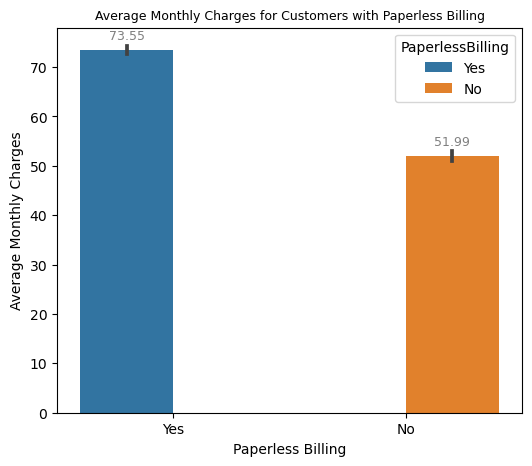

<IPython.core.display.Javascript object>

In [32]:
avg_monthly_charge = round(
    df.loc[df["PaperlessBilling"] == "Yes", "MonthlyCharges"].mean(), 2
)
print(
    "The average monthly charges for customers with paperless billing is: ",
    avg_monthly_charge,
    "$",
)

plt.figure(figsize=(6, 5))

ax = sns.barplot(
    x="PaperlessBilling", y="MonthlyCharges", data=df, hue="PaperlessBilling"
)

plt.title("Average Monthly Charges for Customers with Paperless Billing", fontsize=9)
plt.xlabel("Paperless Billing")
plt.ylabel("Average Monthly Charges")

for p in ax.patches:
    ax.annotate(
        "{:.2f}".format(p.get_height()),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=9,
        color="gray",
        xytext=(0, 10),
        textcoords="offset points",
    )

plt.show()

| Description|
|:-----------|
|**Technical POV:** The above block code is used to calculate the average monthly charges for customers with paperless billing. It uses the pandas library to select the customers with paperless billing from the dataset and then calculates the mean of the 'MonthlyCharges' column. Then, it uses the seaborn library to plot a bar graph of the average monthly charges for customers with and without paperless billing. The data labels are then added for the bar graph in order to accurately display the corresponding values.|
|**Business POV:** This analysis can be used by the company to identify whether customers with paperless billing are paying higher or lower monthly charges than those without. Furthermore, it can also be used to assess the effectiveness of paperless billing in terms of customer engagement and loyalty.|

# <p style="background-color:#1434A4; font-family:calibri; font-size:70%; text-color:white; text-align:left;color:white" id="q10">Q10. What is the distribution of tenancy of customers compared to their contracts? Please share related Plots in the Report Folder.<a name="q10"></a></p>

File saved successfully!
File Name: Tenure-vs-Contract-2023-01-15-12-55
File Path: .\Reports


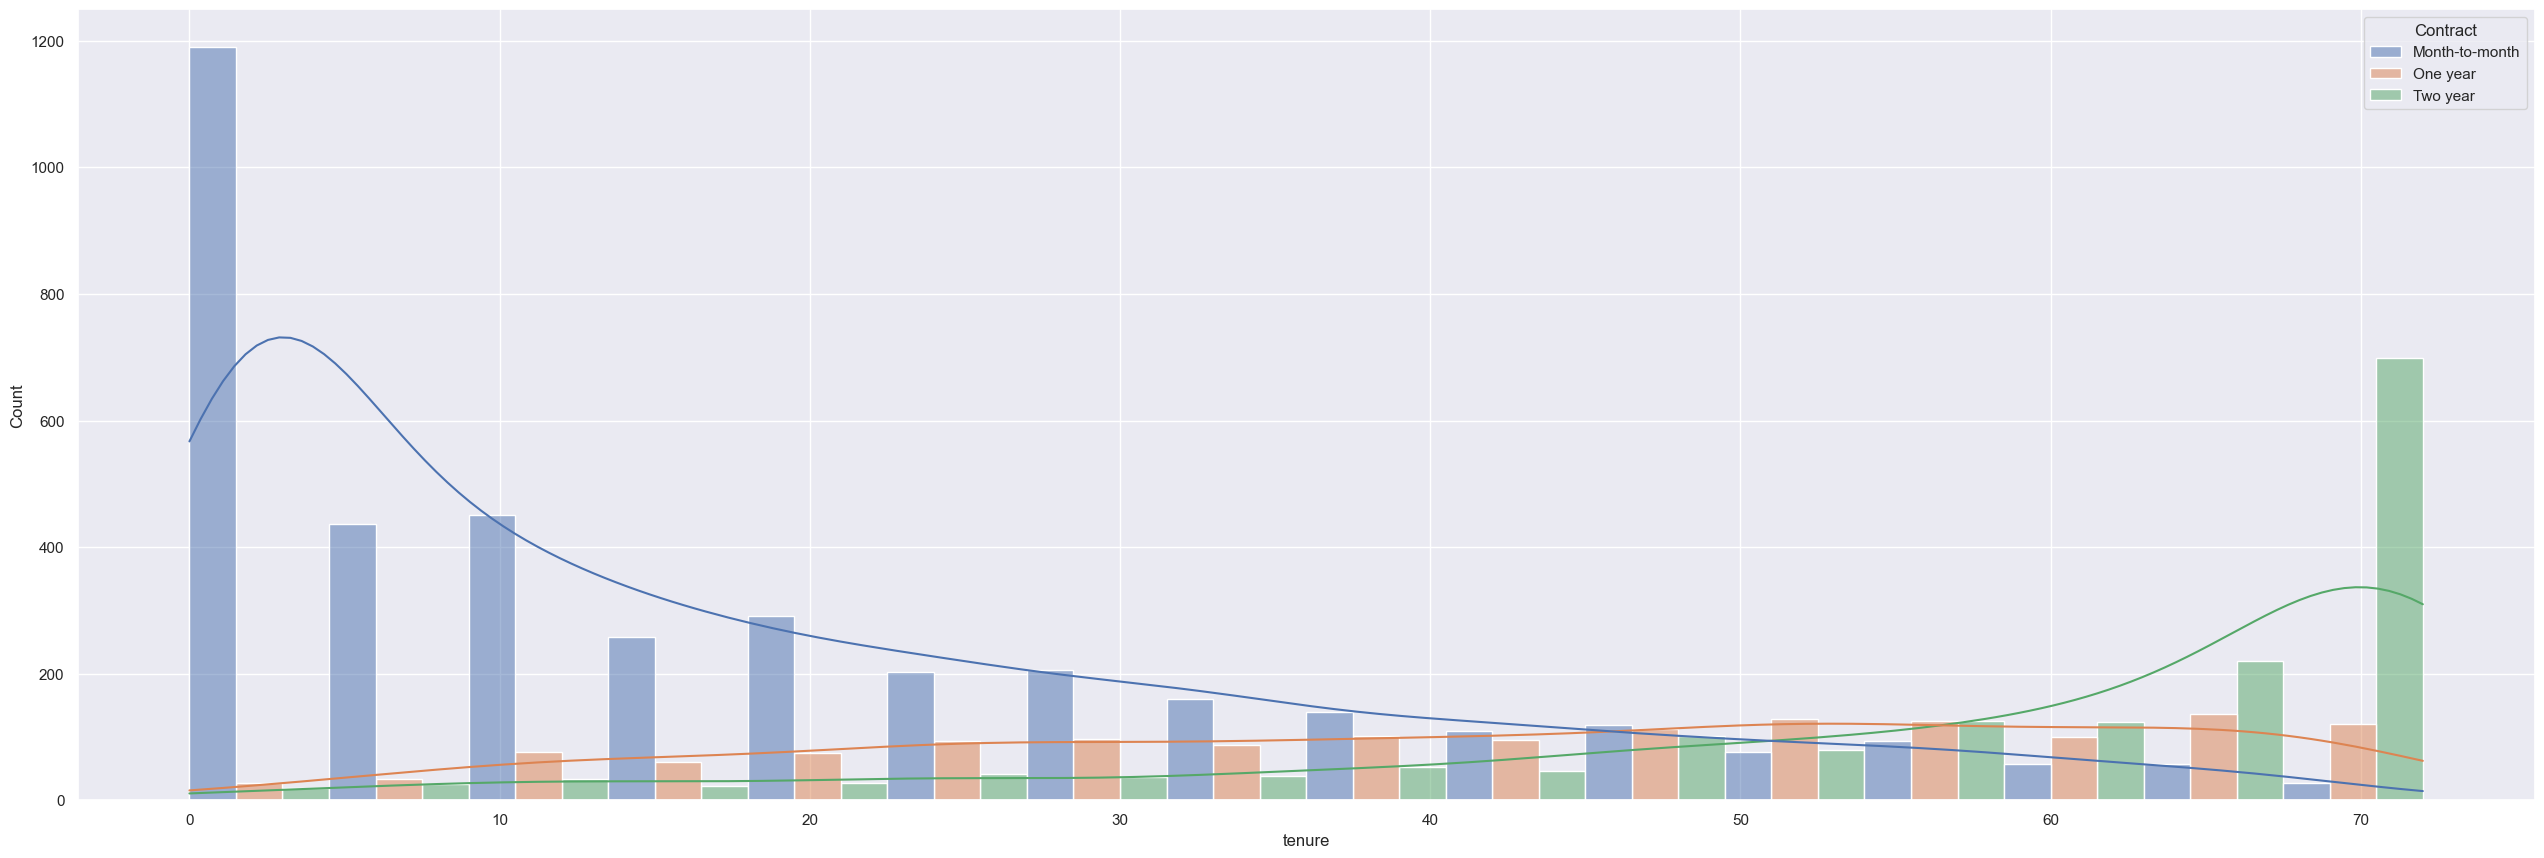

<IPython.core.display.Javascript object>

In [25]:
sns.set(rc={"figure.figsize": (31.7, 10.27)})
plt_cntrc = sns.histplot(
    data=df,
    x="tenure",
    hue="Contract",
    multiple="dodge",
    kde=True,
)
plt_cntrc

fig = plt_cntrc.get_figure()
fig.savefig(
    ".\Reports\Tenure-vs-Contract-"
    + datetime.datetime.now().strftime(format="%Y-%m-%d-%H-%M")
    + ".png"
)

print(
    "File saved successfully!"
    + "\n"
    + "File Name: Tenure-vs-Contract-"
    + datetime.datetime.now().strftime(format="%Y-%m-%d-%H-%M")
    + "\n"
    + "File Path: .\Reports"
)

| Description|
|:-----------|
|**Technical POV:** The above block code is implementing a histogram plot to analyze the tenure of customers and their corresponding contracts. The seaborn library is used to generate the plot. The data is taken from a dataset containing information about customer churn in a telco company. The data is loaded into a dataframe and the hue parameter is used to differentiate the data points according to the contract type. The multiple parameter is used to dodge the bars and the kde parameter is used to generate a kernel density estimation plot. The figure is then saved to the Reports folder with a name containing the current date and time.|
|**Business POV:** This plot can help the telco company understand how long customers are staying with the company and which contracts are most popular. It can also be used to identify areas of improvement in the customer retention process. For example, if the company notices that customers with longer tenure are associated with certain contract types, then they can focus on those contracts to increase customer loyalty. Additionally, the company can use the data to focus on specific areas of customer service and make improvements where needed. By understanding customer churn and their contract types, the company can make better decisions about pricing and product offerings to increase customer satisfaction and loyalty.|

# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="conclusion">4. Conclusion<a name="conclusion"></a></p>


The exploratory data analysis pipeline conducted on the given dataset has answered 10 business questions posed by the client company. In the process, I have identified and addressed any missing or incorrect data, examined the dataset to better understand its structure and content, developed visualizations to better illustrate the data and answer the business questions, and summarized the results. 

The analysis revealed that there are more male than female customers with seniority status, and that the percentage of customers who have churned is 17.52%. The highest total charge was 8684.80, while the lowest total charge was 18.8. The most frequently utilized payment option is Electronic check, and the average monthly charge for customers with Fiber-Optic internet services who have churned is 75.57. The average monthly charge for customers with paperless billing is 59.19. Lastly, the distribution of the tenancy of customers compared to their contracts revealed that most customers have a month-to-month contract.

Based on the findings of this exploratory data analysis, it is recommended that the client company take a closer look at the customers with Fiber-Optic internet services who have churned and consider offering incentives such as lower charges or additional services to encourage them to remain customers. In addition, the company should focus on improving customer satisfaction by providing more options for payment and contract length. Finally, the company should continue to monitor customer churn rates and make necessary changes to retain customers and improve their experience.

# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="references">5. References<a name="references"></a></p>



* (no date) Markdown for jupyter notebooks cheatsheet. Available at: https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet (Accessed: January 12, 2023). 
* Community.ibm.com. 2022. Telco customer churn (11.1.3+). [online] Available at: <https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113> (Accessed January 05, 2023).
* Kaggle.com. 2022. Telco Customer Churn. [online] Available at: <https://www.kaggle.com/datasets/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv> (Accessed: January 10, 2023).

* Seaborn.histplot# (no date) seaborn.histplot - seaborn 0.12.2 documentation. Available at: https://seaborn.pydata.org/generated/seaborn.histplot.html (Accessed: January 10, 2023). 
